# Model and Analysis of Demand for Shared Bikes

### Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people.

## Goal

To model the demand for shared bikes with the available independent variables.  The company wants to understand the factors affecting the demand for these shared bikes in the American market. To be specific, the factors like
 
     1) Which variables are significant in predicting the demand for shared bikes.
     2) How well those variables describe the bike demands

#### Importing Required Libraries

In [360]:

import sklearn
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import statsmodels 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from datetime import datetime 

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Loading of Dataset

In [361]:
boom_bikes=pd.read_csv('day.csv')
boom_bikes.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


#### Description of Variables in Dataset
    - instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	- weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [362]:
#Check the initial shape. Find out the number of rows and columns
boom_bikes.shape

(730, 16)

In [363]:
boom_bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data cleaning - Handle missing or null values.

In [364]:
#Check if there are any null values in the given data set.
boom_bikes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Found there are NO null values. There is no requirement of handling missing values

In [365]:
#Checking the existing columns
boom_bikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### Data cleaning (continued) - Removal of unnecessary columns


1) dteday is not needed as we have useful variables like yr and month.  
2) instant is just an index variable, thus not necessary. 
3) casual+registered=cnt and cnt is our target variable. Dropping "Casual" and "registered" variables.

In [366]:
boom_bikes.drop(['instant','dteday','casual', 'registered'], inplace=True, axis = 1)
boom_bikes.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [367]:
#Check the updated shape
boom_bikes.shape

(730, 12)

### Data Preparation and EDA 


In [368]:
#For the variable 'season', numbers are assigned, These to make sense and to analyse further need to be converted categorical
#variables. As mentioned in the desciption of variables of dataset, 
#the numbers are converted as season : season (1:spring, 2:summer, 3:fall, 4:winter)

def seasonnum2str(num):
    if (num==1):
        return "spring"
    elif (num==2):
        return "summer"
    elif (num==3):
        return "fall"
    elif (num==4):
        return "winter"
    else:
        return "NA"

boom_bikes['season'] = boom_bikes['season'].apply(seasonnum2str)                                                 
                    

In [369]:
boom_bikes.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [370]:
#Verify if there any season stored as NA instead of [spring, summer, fall, winter]
boom_bikes[boom_bikes["season"]=='NA'].head(10)

#Result - There are NO rows with NA as season.

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt


In [371]:
# convert the mnth in to categorical variable 

boom_bikes['mnth'].replace({1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"},inplace=True)


In [372]:
# The variable weathersit is converted into a categorical variable.

boom_bikes['weathersit'].replace({1:"Clear_SlightlyCloudy",2:"Mist_Cloudy",3:"Light_Snow_Thunder",4:'Heavy_Snow_thunder_Fog'},inplace=True)

In [373]:
# Convert the weekday variable to categorical variable

boom_bikes['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)


In [374]:
#Using the value_counts(), find out if there any other value that does not fall under the required 
#weekday, weather condition and month. THis step is done to check if there is any junk values.
boom_bikes['weekday'].value_counts()

Sunday       105
Saturday     105
Monday       105
Thursday     104
Friday       104
Tuesday      104
Wednesday    103
Name: weekday, dtype: int64

In [375]:
boom_bikes['weathersit'].value_counts()

Clear_SlightlyCloudy    463
Mist_Cloudy             246
Light_Snow_Thunder       21
Name: weathersit, dtype: int64

In [376]:
#Observation:  There are no rows present when the weather condition was Heavy_Thunder_Snow_Fog.
boom_bikes[boom_bikes['weathersit'] == 'Heavy_Thunder_Snow_Fog']

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt


In [377]:
boom_bikes['mnth'].value_counts()

May          62
October      62
March        62
December     62
August       62
July         62
January      62
April        60
November     60
September    60
June         60
February     56
Name: mnth, dtype: int64

In [378]:
# A simple verification step to check the above mentioned steps are executed correctly or not.
boom_bikes.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Saturday,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Sunday,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Monday,1,Clear_SlightlyCloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Tuesday,1,Clear_SlightlyCloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Wednesday,1,Clear_SlightlyCloudy,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,January,0,Thursday,1,Clear_SlightlyCloudy,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,January,0,Friday,1,Mist_Cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,January,0,Saturday,0,Mist_Cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,January,0,Sunday,0,Clear_SlightlyCloudy,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,January,0,Monday,1,Clear_SlightlyCloudy,6.184153,7.54440,48.2917,14.958889,1321


In [379]:
boom_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


### Data Visualization

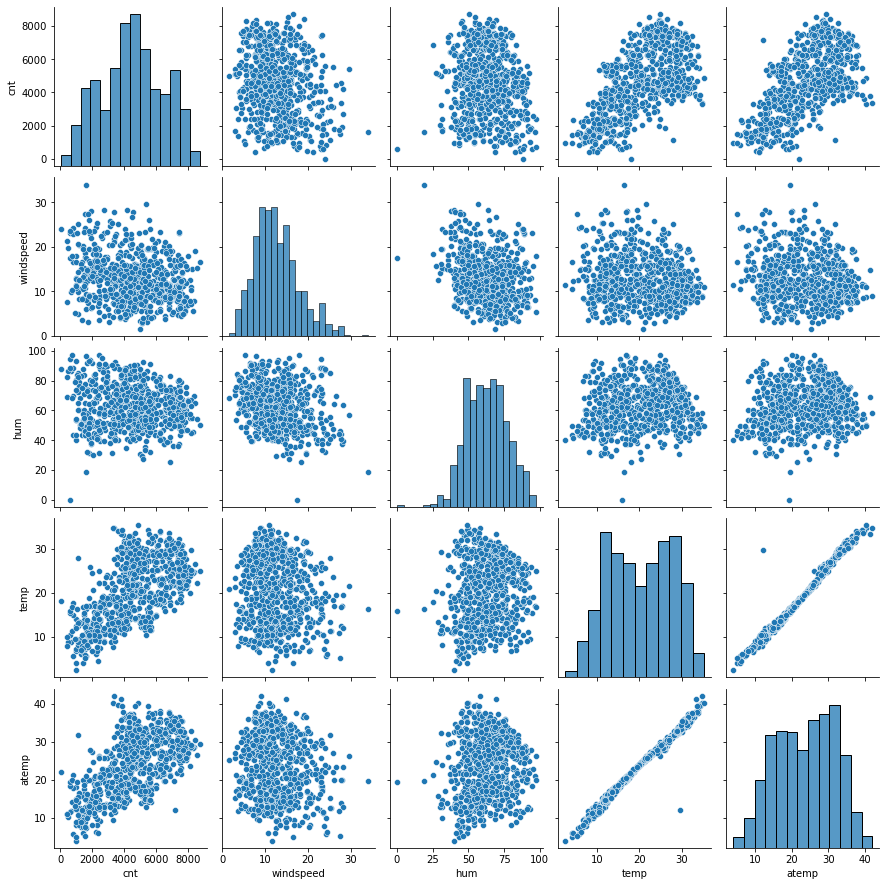

In [380]:
# Pairplots can be used to check if there is any co-relation between variables.

sns.pairplot(boom_bikes, vars=['cnt','windspeed','hum','temp','atemp'])

plt.show()

#### Observation:  There is high co-relation between variables 'temp' and 'atemp' 

<AxesSubplot:>

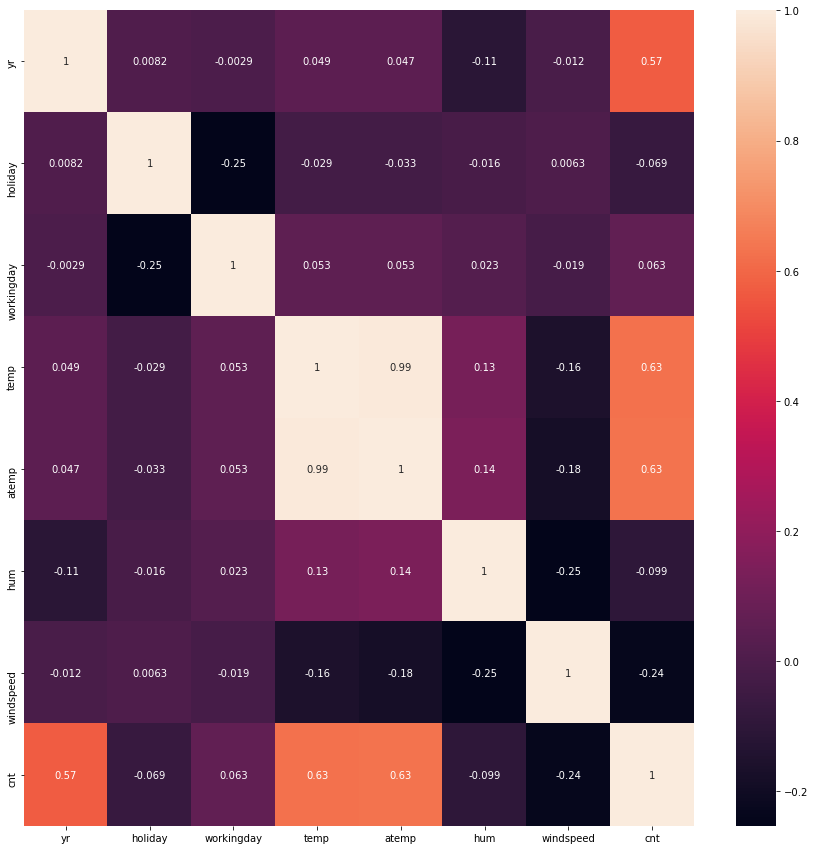

In [381]:
# To verify the correlation, heatmap are used
plt.figure(figsize = (15,15))
sns.heatmap(boom_bikes.corr(), annot = True)

In [382]:
#The variables, temp and atemp are highly co-related. 
#Hence, their correlation need to checked to avoid multi-collinearity.
#temp and atemp are highly positively correlated with a value of 0.99. Hence calculating VIF to find which variable to drop.

vals = boom_bikes[['temp','atemp','hum','windspeed',"cnt"]]
X = add_constant(vals)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)


const        52.978017
temp         62.993716
atemp        63.935491
hum           1.178404
windspeed     1.187971
cnt           1.862057
dtype: float64

Since atemp has a higher VIF, dropping that column to avoid muticollinearity.

In [383]:
boom_bikes.drop(['atemp'],axis=1,inplace=True)
boom_bikes.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,January,0,Saturday,0,Mist_Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,January,0,Sunday,0,Mist_Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,January,0,Monday,1,Clear_SlightlyCloudy,8.050924,43.7273,16.636703,1349
3,spring,0,January,0,Tuesday,1,Clear_SlightlyCloudy,8.200000,59.0435,10.739832,1562
4,spring,0,January,0,Wednesday,1,Clear_SlightlyCloudy,9.305237,43.6957,12.522300,1600
5,spring,0,January,0,Thursday,1,Clear_SlightlyCloudy,8.378268,51.8261,6.000868,1606
6,spring,0,January,0,Friday,1,Mist_Cloudy,8.057402,49.8696,11.304642,1510
7,spring,0,January,0,Saturday,0,Mist_Cloudy,6.765000,53.5833,17.875868,959
8,spring,0,January,0,Sunday,0,Clear_SlightlyCloudy,5.671653,43.4167,24.250650,822
9,spring,0,January,0,Monday,1,Clear_SlightlyCloudy,6.184153,48.2917,14.958889,1321


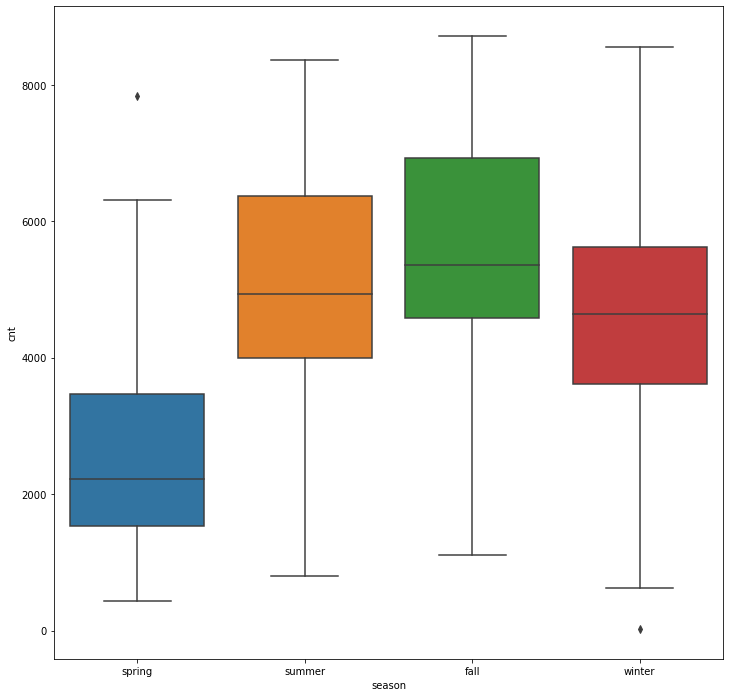

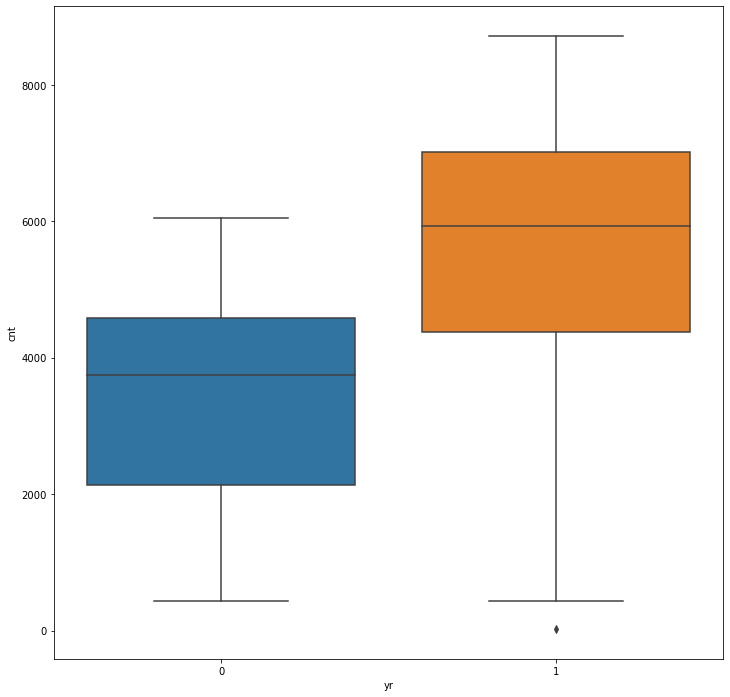

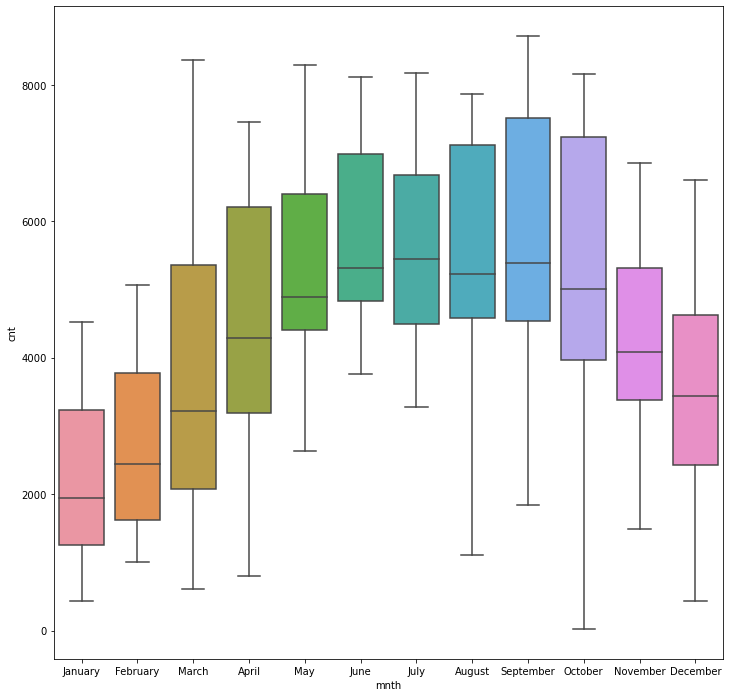

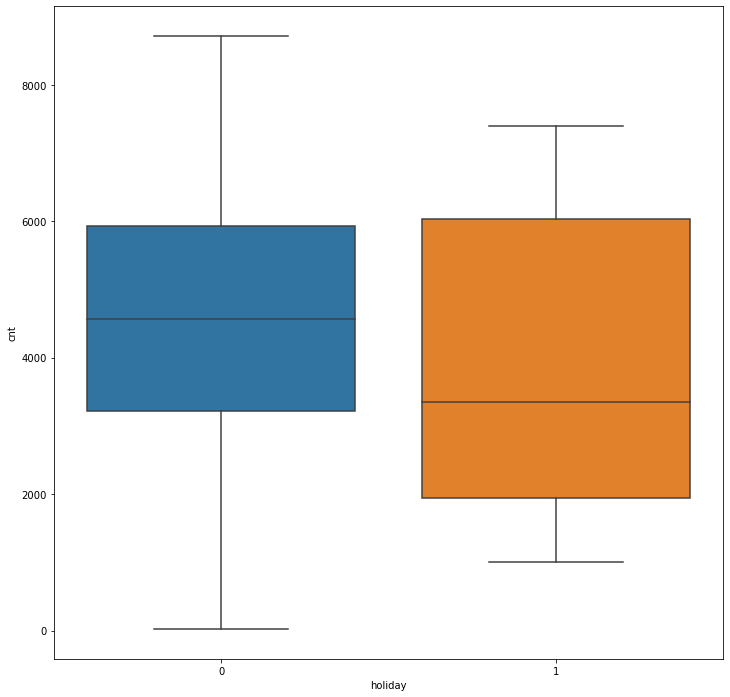

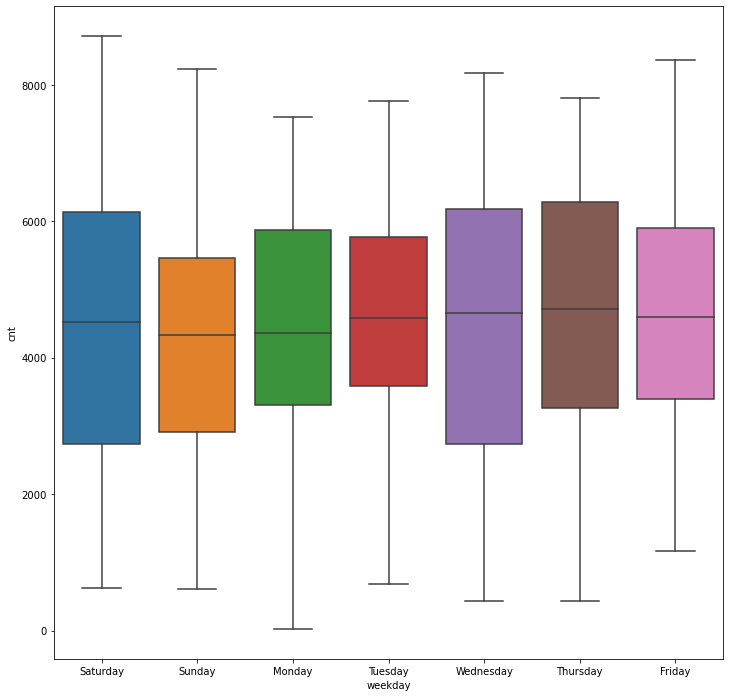

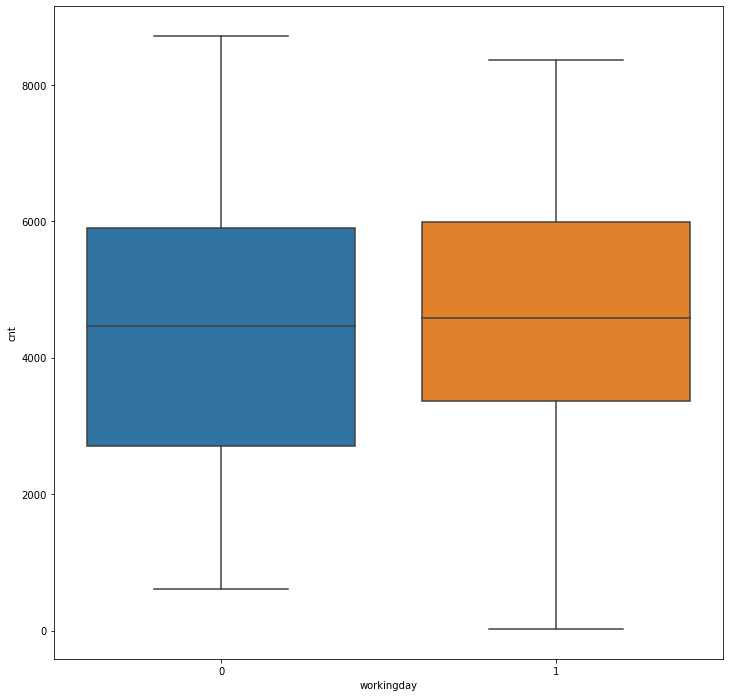

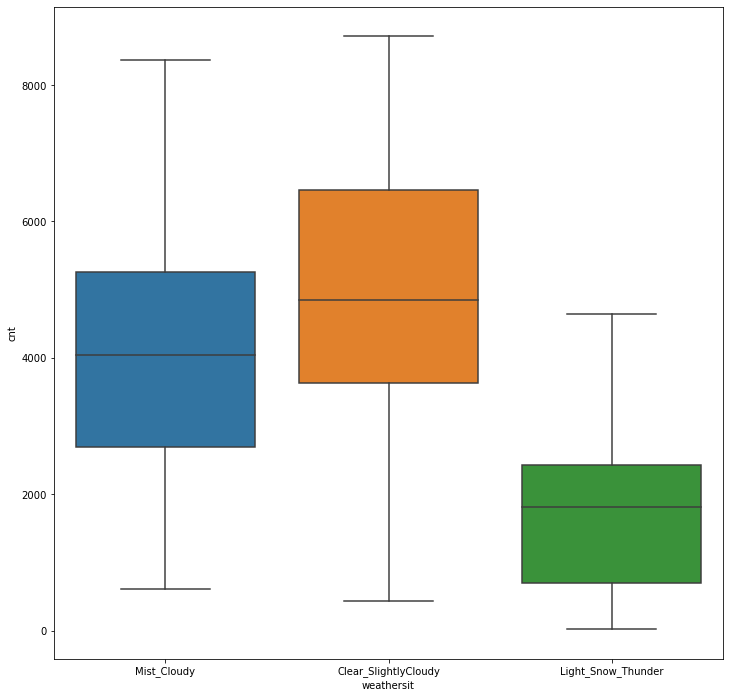

In [384]:
#Visualization of  the categorical variables  with respect to the variable 'cnt'
category_vals=[ 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit']
for col in category_vals:
    plt.figure(figsize=(12,12))
    sns.boxplot(x=col,y='cnt',data=boom_bikes)
    plt.show()

### Observation:

1. Plot - Season versus Cnt:  Demand is highest in Fall season, but least in Spring season.
2. Plot - Year versus Cnt: Demand in year 2019 was high compared with the year 2018
3. Plot - Month versus Cnt: Demand is high from May to October, However September month has highest demand 
4. Plot - Weather versus Cnt: Demand is high when the weather is clear. There is no demand at all, when the weather is high_rain_snow_thunder_fog. 
5. There is a linear trend between independent categorical variables and the target variable cnt
6. season, yr, month, and weathersit appear to have a major influence on the demand of bike rental compared to to working day and weekday.

### Encoding
Creating dummy variables.

In [385]:
# Variables such as month, season, weathersit, weekday used as a categorical data 
# k - 1 dummy variables will be generated.
# Only these variables/features to be included in the machine learning model 
#Note: For readiblity purposes, the below code is split into four lines. It can be coded in a single line as well. 

#create a dummy variable for month
#when everything is zero then 'April' month is selected
mnth_dum = pd.get_dummies(boom_bikes['mnth'], drop_first=True)

#creare a dummy variable for season 
#when everything is zero then it is a 'fall' season
season_dum = pd.get_dummies(boom_bikes['season'], drop_first=True)

#create a dummy variable for weekday 
#when everything is zero then it is a 'friday'
weekday_dum = pd.get_dummies(boom_bikes['weekday'], drop_first=True)

#create a weathersit dummy variable 
#when everything is zero then it is a 'Clear_FewCloudy'
weathersit_dum = pd.get_dummies(boom_bikes['weathersit'], drop_first=True)


In [386]:
boom_bikes =pd.concat([boom_bikes,mnth_dum, season_dum, weekday_dum, weathersit_dum],axis=1)
boom_bikes.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow_Thunder,Mist_Cloudy
0,spring,0,January,0,Saturday,0,Mist_Cloudy,14.110847,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,January,0,Sunday,0,Mist_Cloudy,14.902598,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,January,0,Monday,1,Clear_SlightlyCloudy,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,January,0,Tuesday,1,Clear_SlightlyCloudy,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,January,0,Wednesday,1,Clear_SlightlyCloudy,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0
5,spring,0,January,0,Thursday,1,Clear_SlightlyCloudy,8.378268,51.8261,6.000868,...,0,0,0,0,0,1,0,0,0,0
6,spring,0,January,0,Friday,1,Mist_Cloudy,8.057402,49.8696,11.304642,...,0,0,0,0,0,0,0,0,0,1
7,spring,0,January,0,Saturday,0,Mist_Cloudy,6.765000,53.5833,17.875868,...,0,0,0,1,0,0,0,0,0,1
8,spring,0,January,0,Sunday,0,Clear_SlightlyCloudy,5.671653,43.4167,24.250650,...,0,0,0,0,1,0,0,0,0,0
9,spring,0,January,0,Monday,1,Clear_SlightlyCloudy,6.184153,48.2917,14.958889,...,0,0,1,0,0,0,0,0,0,0


In [387]:
boom_bikes.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt', 'August', 'December',
       'February', 'January', 'July', 'June', 'March', 'May', 'November',
       'October', 'September', 'spring', 'summer', 'winter', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'Light_Snow_Thunder', 'Mist_Cloudy'],
      dtype='object')

In [388]:
#Deleting the orginal season,weathersit,weekday columns
boom_bikes.drop(['season', 'weathersit', 'weekday','mnth'],axis=1,inplace=True)
#Deleting the variable 'Holiday' as it is redundant when there is variable named workingday
boom_bikes.drop(['holiday'],axis=1,inplace=True)


boom_bikes.head()

,yr,workingday,temp,hum,windspeed,cnt,August,December,February,January,...,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow_Thunder,Mist_Cloudy
0,0,0,14.110847,80.5833,10.749882,985,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,0,0,14.902598,69.6087,16.652113,801,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,0,1,8.050924,43.7273,16.636703,1349,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,0,1,8.200000,59.0435,10.739832,1562,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0,1,9.305237,43.6957,12.522300,1600,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [389]:
boom_bikes.columns

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'cnt', 'August',
       'December', 'February', 'January', 'July', 'June', 'March', 'May',
       'November', 'October', 'September', 'spring', 'summer', 'winter',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'Light_Snow_Thunder', 'Mist_Cloudy'],
      dtype='object')

### Creating Model
Test and train splits with appropriate scaling

In [390]:
bike_train, bike_test = train_test_split(boom_bikes,train_size = 0.7, test_size = 0.3, random_state = 100)

In [391]:
bike_train.shape

(510, 28)

In [392]:
bike_test.shape

(219, 28)

In [393]:
#Scaling Numeric data using MinMax scalar (it will not affect dummy variables)
scaler=MinMaxScaler()
vars=['temp','hum','windspeed','cnt']
bike_train[vars] = scaler.fit_transform(bike_train[vars])
bike_train.head()

,yr,workingday,temp,hum,windspeed,cnt,August,December,February,January,...,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow_Thunder,Mist_Cloudy
653,1,1,0.509887,0.575354,0.300794,0.864243,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
576,1,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0.442393,0.640189,0.255342,0.465255,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,0.204096,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0.482973,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [394]:
bike_train.describe()

,yr,workingday,temp,hum,windspeed,cnt,August,December,February,January,...,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow_Thunder,Mist_Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.676471,0.537262,0.650369,0.320768,0.513620,0.096078,0.084314,0.066667,0.088235,...,0.245098,0.24902,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.468282,0.225844,0.145882,0.169797,0.224593,0.294988,0.278131,0.249689,0.283915,...,0.430568,0.43287,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [395]:
#Splitting the train data into independent(x) variables and target(y) variable.
y_bike_train = bike_train.pop('cnt')
x_bike_train = bike_train 

In [396]:
y_bike_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [397]:
x_bike_train.head()

,yr,workingday,temp,hum,windspeed,August,December,February,January,July,...,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow_Thunder,Mist_Cloudy
653,1,1,0.509887,0.575354,0.300794,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
576,1,1,0.815169,0.725633,0.264686,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [398]:
# Fitting the linear regression on train dataset
lm = LinearRegression()
lm.fit(x_bike_train, y_bike_train)
#Selecting features using RFE
rfe = RFE(lm)
rfe = rfe.fit(x_bike_train, y_bike_train)


In [399]:
# Displaying influence of each of the independent variable using rfe ranking
list(zip(x_bike_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('August', False, 8),
 ('December', False, 5),
 ('February', False, 6),
 ('January', False, 3),
 ('July', True, 1),
 ('June', False, 14),
 ('March', False, 15),
 ('May', False, 7),
 ('November', False, 4),
 ('October', False, 11),
 ('September', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('Monday', False, 9),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 12),
 ('Tuesday', False, 10),
 ('Wednesday', False, 13),
 ('Light_Snow_Thunder', True, 1),
 ('Mist_Cloudy', True, 1)]

In [400]:
# Selecting the influencing independent variables from the rfe ranking
select_col = x_bike_train.columns[rfe.support_]
select_col

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'July', 'September',
       'spring', 'winter', 'Saturday', 'Sunday', 'Light_Snow_Thunder',
       'Mist_Cloudy'],
      dtype='object')

In [401]:
# Assigning the selected varaibles to the x data to build the actual model
x_bike_train_rfe = x_bike_train[select_col]

In [402]:
# adding the constant
x_bike_train_rfe = sm.add_constant(x_bike_train_rfe)
#Fitting the data using Linear Regression to build model
lm = sm.OLS(y_bike_train,x_bike_train_rfe).fit()   
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Wed, 22 Jun 2022   Prob (F-statistic):          3.81e-190
Time:                        18:17:32   Log-Likelihood:                 511.45
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     496   BIC:                            -935.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2331      0

In [403]:
#Calculation of VIF, followed by removal of features based on VIF and p value 

Vif = pd.DataFrame()
Vif['Features'] = x_bike_train_rfe.columns
Vif['VIF'] = [variance_inflation_factor(x_bike_train_rfe.values, i) for i in range (x_bike_train_rfe.shape[1])]
Vif['VIF'] = round(Vif['VIF'],2)
Vif = Vif.sort_values(by = "VIF", ascending = False)
Vif

,Features,VIF
0,const,99.67
2,workingday,9.07
10,Saturday,6.06
11,Sunday,5.74
3,temp,2.99
8,spring,2.55
4,hum,1.89
9,winter,1.78
13,Mist_Cloudy,1.57
6,July,1.30


In [404]:
# Dropping 'Sunday' because it's p-value is higher than 0.05 indicating it's not significant
x_bike_train_rfe = x_bike_train_rfe.drop('Sunday', axis =1)
x_bike_train_rfe = sm.add_constant(x_bike_train_rfe)
lm = sm.OLS(y_bike_train, x_bike_train_rfe).fit()
print(lm.summary())

Vif = pd.DataFrame()
Vif['Features'] = x_bike_train_rfe.columns
Vif['VIF'] = [variance_inflation_factor(x_bike_train_rfe.values, i) for i in range (x_bike_train_rfe.shape[1])]
Vif['VIF'] = round(Vif['VIF'],2)
Vif = Vif.sort_values(by = "VIF", ascending = False)
Vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Wed, 22 Jun 2022   Prob (F-statistic):          2.88e-190
Time:                        18:17:32   Log-Likelihood:                 508.93
No. Observations:                 510   AIC:                            -991.9
Df Residuals:                     497   BIC:                            -936.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2842      0

,Features,VIF
0,const,66.26
3,temp,2.99
8,spring,2.54
4,hum,1.89
9,winter,1.77
2,workingday,1.65
10,Saturday,1.64
12,Mist_Cloudy,1.57
6,July,1.30
11,Light_Snow_Thunder,1.25


#### Now all p-values are within the acceptable range of <0.05.  Removing VIF values which are out of range.

In [405]:
#Dropping const first to see if any other variables are out of range.

x_bike_train_rfe = x_bike_train_rfe.drop('const', axis =1)

In [406]:
x_bike_train_rfe.columns

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'July', 'September',
       'spring', 'winter', 'Saturday', 'Light_Snow_Thunder', 'Mist_Cloudy'],
      dtype='object')

In [407]:

Vif = pd.DataFrame()
Vif['Features'] = x_bike_train_rfe.columns
Vif['VIF'] = [variance_inflation_factor(x_bike_train_rfe.values, i) for i in range (x_bike_train_rfe.shape[1])]
Vif['VIF'] = round(Vif['VIF'],2)
Vif = Vif.sort_values(by = "VIF", ascending = False)
Vif

,Features,VIF
3,hum,23.18
2,temp,15.91
1,workingday,4.63
4,windspeed,4.12
7,spring,2.59
11,Mist_Cloudy,2.23
8,winter,2.09
0,yr,2.06
9,Saturday,1.82
5,July,1.40


#### Found that variable 'hum' and 'temp' are out of range. The values are higher than 5. So first 'hum' variable is removed since it has the highest VIF.

In [408]:
x_bike_train_rfe = x_bike_train_rfe.drop('hum', axis =1)
x_bike_train_rfe = sm.add_constant(x_bike_train_rfe)
lm = sm.OLS(y_bike_train, x_bike_train_rfe).fit()
print(lm.summary())

Vif = pd.DataFrame()
Vif['Features'] = x_bike_train_rfe.columns
Vif['VIF'] = [variance_inflation_factor(x_bike_train_rfe.values, i) for i in range (x_bike_train_rfe.shape[1])]
Vif['VIF'] = round(Vif['VIF'],2)
Vif = Vif.sort_values(by = "VIF", ascending = False)
Vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     232.9
Date:                Wed, 22 Jun 2022   Prob (F-statistic):          2.53e-188
Time:                        18:17:32   Log-Likelihood:                 501.49
No. Observations:                 510   AIC:                            -979.0
Df Residuals:                     498   BIC:                            -928.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2038      0

,Features,VIF
0,const,38.83
3,temp,2.83
7,spring,2.53
8,winter,1.71
2,workingday,1.65
9,Saturday,1.63
5,July,1.28
6,September,1.10
4,windspeed,1.08
10,Light_Snow_Thunder,1.05


In [409]:
#Drop const again to check the updated list of VIF.
x_bike_train_rfe = x_bike_train_rfe.drop('const', axis =1)
Vif = pd.DataFrame()
Vif['Features'] = x_bike_train_rfe.columns
Vif['VIF'] = [variance_inflation_factor(x_bike_train_rfe.values, i) for i in range (x_bike_train_rfe.shape[1])]
Vif['VIF'] = round(Vif['VIF'],2)
Vif = Vif.sort_values(by = "VIF", ascending = False)
Vif

,Features,VIF
2,temp,6.54
1,workingday,4.47
3,windspeed,4.11
0,yr,2.06
6,spring,1.81
8,Saturday,1.79
10,Mist_Cloudy,1.54
7,winter,1.45
4,July,1.36
5,September,1.20


#### 'Temp' variable still has higher VIF, greater than 5. So this needs to be dropped.



In [410]:
x_bike_train_rfe = x_bike_train_rfe.drop('temp', axis =1)
x_bike_train_rfe = sm.add_constant(x_bike_train_rfe)
lm = sm.OLS(y_bike_train, x_bike_train_rfe).fit()
print(lm.summary())

Vif = pd.DataFrame()
Vif['Features'] = x_bike_train_rfe.columns
Vif['VIF'] = [variance_inflation_factor(x_bike_train_rfe.values, i) for i in range (x_bike_train_rfe.shape[1])]
Vif['VIF'] = round(Vif['VIF'],2)
Vif = Vif.sort_values(by = "VIF", ascending = False)
Vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     162.0
Date:                Wed, 22 Jun 2022   Prob (F-statistic):          1.17e-149
Time:                        18:17:32   Log-Likelihood:                 407.27
No. Observations:                 510   AIC:                            -792.5
Df Residuals:                     499   BIC:                            -746.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5085      0

,Features,VIF
0,const,13.47
2,workingday,1.65
8,Saturday,1.63
6,spring,1.26
7,winter,1.23
4,July,1.13
3,windspeed,1.07
5,September,1.07
9,Light_Snow_Thunder,1.05
10,Mist_Cloudy,1.04


In [411]:
# removing variable "July" because the p-value is higher

x_bike_train_rfe = x_bike_train_rfe.drop('July', axis =1)
x_bike_train_rfe = sm.add_constant(x_bike_train_rfe)
lm = sm.OLS(y_bike_train, x_bike_train_rfe).fit()
print(lm.summary())

Vif = pd.DataFrame()
Vif['Features'] = x_bike_train_rfe.columns
Vif['VIF'] = [variance_inflation_factor(x_bike_train_rfe.values, i) for i in range (x_bike_train_rfe.shape[1])]
Vif['VIF'] = round(Vif['VIF'],2)
Vif = Vif.sort_values(by = "VIF", ascending = False)
Vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     179.9
Date:                Wed, 22 Jun 2022   Prob (F-statistic):          1.33e-150
Time:                        18:17:32   Log-Likelihood:                 406.80
No. Observations:                 510   AIC:                            -793.6
Df Residuals:                     500   BIC:                            -751.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5129      0

,Features,VIF
0,const,12.56
2,workingday,1.64
7,Saturday,1.63
5,spring,1.19
6,winter,1.15
3,windspeed,1.06
4,September,1.05
8,Light_Snow_Thunder,1.05
9,Mist_Cloudy,1.03
1,yr,1.01


In [412]:
#drop const again and check the updated list of VIF.
x_bike_train_rfe = x_bike_train_rfe.drop('const', axis =1)
x_bike_train_final = x_bike_train_rfe
Vif = pd.DataFrame()
Vif['Features'] = x_bike_train_rfe.columns
Vif['VIF'] = [variance_inflation_factor(x_bike_train_rfe.values, i) for i in range (x_bike_train_rfe.shape[1])]
Vif['VIF'] = round(Vif['VIF'],2)
Vif = Vif.sort_values(by = "VIF", ascending = False)
Vif


,Features,VIF
2,windspeed,3.42
1,workingday,3.07
0,yr,1.87
6,Saturday,1.52
8,Mist_Cloudy,1.52
4,spring,1.51
5,winter,1.39
3,September,1.11
7,Light_Snow_Thunder,1.08


#### Observation: Now all the p-values and  VIF are with in the range. The acceptable is range of p value is below 0.05. The acceptable range of VIF is below 5.  The model is finalized and can be used on test set.

### Residual Analysis

#### Check if error terms are normally distributed. This is one of the assumption of linear regression 

In [413]:
x_bike_train_rfe = sm.add_constant(x_bike_train_rfe)
lm = sm.OLS(y_bike_train, x_bike_train_rfe).fit()
y_bike_train_pred = lm.predict(x_bike_train_rfe)

Text(0.5, 0, 'Errors')

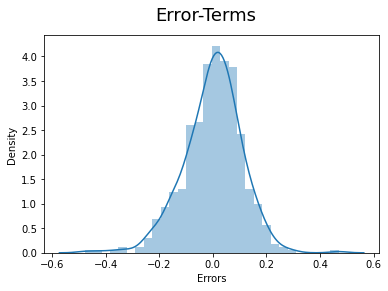

In [414]:
res_error = y_bike_train - y_bike_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(res_error, bins = 30)
fig.suptitle('Error-Terms', fontsize = 18)                  
plt.xlabel('Errors', fontsize = 10)  

Text(0.5, 1.0, 'Q-Q Plot')

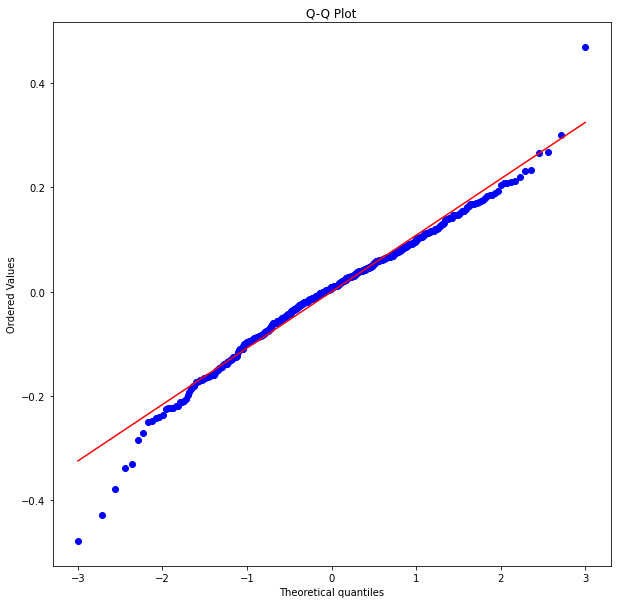

In [415]:
# Plotting Q-Q plot to confirm normal distribution of errors
plt.figure(figsize=(10,10))
stats.probplot(res_error, dist="norm", plot=plt)
plt.title("Q-Q Plot")

Text(0.5, 1.0, 'Residual plot')

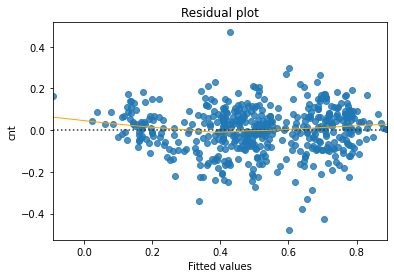

In [416]:
# scatter plot
fig = plt.figure()
sns.residplot(y_bike_train_pred,y_bike_train, lowess=True, line_kws={'color': 'orange', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.title('Residual plot')     

Text(0.5, 0, 'Fitted value')

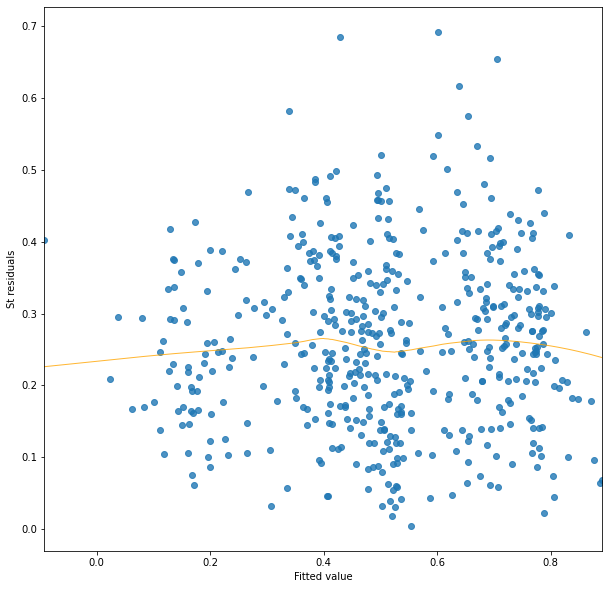

In [417]:
#Plotting Scale-Location plot to verify the homoscedasticity of residuals
norm_residuals=np.sqrt(np.abs(res_error))

plt.figure(figsize=(10,10))
sns.regplot(y_bike_train_pred, norm_residuals,
              scatter=True,
              lowess=True,
              line_kws={'color': 'orange', 'lw': 1, 'alpha': 0.8})
plt.ylabel("St residuals")
plt.xlabel("Fitted value")

#### By going through the plots, we can conclude that this model can be used for predictions

### Executing Predictions

In [418]:
# Applying the scaling on the test sets
nvars=['temp', 'hum' ,'windspeed','cnt']
bike_test[nvars]= scaler.transform(bike_test[nvars])

In [419]:
y_bike_test = bike_test.pop('cnt')
x_bike_test = bike_test

In [420]:
# Modifying test dataframe by dropping variables eliminated variables and assigning it to a new data frame
x_bike_test = x_bike_test[x_bike_train_final.columns]

# Adding a constant variable 
x_bike_test = sm.add_constant(x_bike_test)

In [421]:
# Making predictions
y_bike_test_pred = lm.predict(x_bike_test)

### Evaluation of model

Text(0, 0.5, 'y_bike_test_pred')

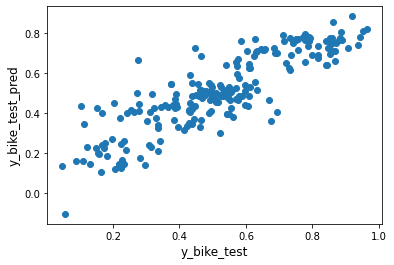

In [422]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_bike_test,y_bike_test_pred)
plt.xlabel('y_bike_test', fontsize=12)                          # X-label
plt.ylabel('y_bike_test_pred', fontsize=12)                          # Y-label

In [423]:
r2_train = r2_score(y_bike_train, y_bike_train_pred)
r2_test = r2_score(y_bike_test, y_bike_test_pred)
print("Rsquared value of train data: ", r2_train )
print("Rsquared value of test data: ", r2_test )

Rsquared value of train data:  0.7640832080557614
Rsquared value of test data:  0.7464248751414759


Text(0.5, 1.0, 'Normal Q-Q Plot')

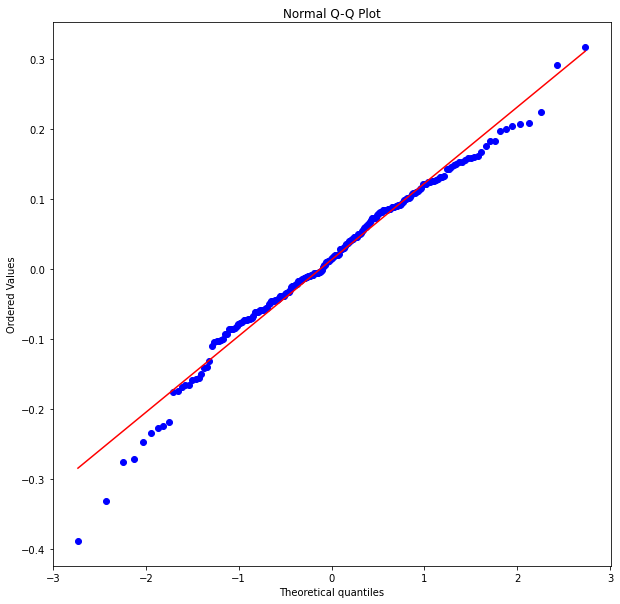

In [424]:
# Plotting Q-Q plot to confirm normal distribution of errors
res_error_test = y_bike_test - y_bike_test_pred

plt.figure(figsize=(10,10))
stats.probplot(res_error_test, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

In [425]:
adj_r2_train = 1-(1-r2_train)*(510-1)/(510-11-1)
adj_r2_test = 1-(1-r2_test)*(219-1)/(219-11-1)
print("Adjusted Rsquared value of train data: ", adj_r2_train )
print("Adjusted Rsquared value of test data : ", adj_r2_test )

Adjusted Rsquared value of train data:  0.7588721945790814
Adjusted Rsquared value of test data :  0.7329498685064819


####  The training and testing accuracy are nearly equal hence there is no Overfit/Underfit situation.


### Conclusion

In [426]:
print(lm.summary())
print(Vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     179.9
Date:                Wed, 22 Jun 2022   Prob (F-statistic):          1.33e-150
Time:                        18:17:34   Log-Likelihood:                 406.80
No. Observations:                 510   AIC:                            -793.6
Df Residuals:                     500   BIC:                            -751.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5129      0

### The model has p values and VIF values within the acceptable range of <0.05 and <5 respectively. The model obeys all assumptions of linear regression. 

The model has a good R^2 score on the test data, which means that the variation in total number of bike rentals can be explained by the variables in the linear regression model built. 

